In [1]:
import pandas as pd
import json
from datetime import datetime
import numpy as np

In [3]:
df_users = pd.read_json('users.json',lines=True)

In [4]:
df_users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [5]:
df_users.shape

(495, 7)

Here if you look at the data set it has 7 columns ie it has 7 feature. Also if you look carefully some features value has some data in data and it needs to be extracted. Example if you look at the '_id', 'createdDate', 'lastLogin'

#  Lets Correct the _id column

In [6]:
# Extract the '$oid' value from each dictionary in the '_id' column
df_users['_id'] = df_users['_id'].apply(lambda x: x.get('$oid') if isinstance(x, dict) and '$oid' in x else None)

# Rename '_id' to 'u_id'
df_users.rename(columns={'_id': 'u_id'}, inplace=True)

In [7]:
df_users.head()

,u_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


# Lets Correct the createdDate, lastLogin column 

In [19]:
date_columns = ['createdDate', 'lastLogin']

for col in date_columns:
    if col in df_users.columns:
        df_users[col] = df_users[col].apply(lambda x: pd.to_datetime(x['$date']/1000, unit='s') if isinstance(x, dict) and '$date' in x else (pd.NaT if pd.isna(x) else x))



In [20]:
df_users.head()

,u_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000000,2021-01-03 15:25:37.858000128,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000000,2021-01-03 15:25:37.858000128,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000000,2021-01-03 15:25:37.858000128,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30.553999872,2021-01-03 15:25:30.596999936,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000000,2021-01-03 15:25:37.858000128,consumer,Email,WI


#  Getting Insights from the data

In [21]:
df_users.isna().sum()

u_id             0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64

In [22]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   u_id          495 non-null    object        
 1   active        495 non-null    bool          
 2   createdDate   495 non-null    datetime64[ns]
 3   lastLogin     433 non-null    datetime64[ns]
 4   role          495 non-null    object        
 5   signUpSource  447 non-null    object        
 6   state         439 non-null    object        
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 23.8+ KB


In [23]:
df_users['role'].value_counts()

consumer       413
fetch-staff     82
Name: role, dtype: int64

In [44]:
df_users['active'].value_counts()

True     494
False      1
Name: active, dtype: int64

In [24]:
df_users['state'].value_counts()

WI    396
NH     20
AL     12
OH      5
IL      3
KY      1
CO      1
SC      1
Name: state, dtype: int64

In [25]:
df_users['signUpSource'].value_counts()

Email     443
Google      4
Name: signUpSource, dtype: int64

In [26]:
## Get the duplicates

duplicates = df_users.duplicated()

In [27]:
duplicates

0      False
1       True
2       True
3      False
4       True
       ...  
490     True
491     True
492     True
493     True
494     True
Length: 495, dtype: bool

In [28]:
duplicate_rows = df_users[df_users.duplicated()]


In [29]:
duplicate_rows

,u_id,active,createdDate,lastLogin,role,signUpSource,state
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000000,2021-01-03 15:25:37.858000128,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000000,2021-01-03 15:25:37.858000128,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000000,2021-01-03 15:25:37.858000128,consumer,Email,WI
5,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000000,2021-01-03 15:25:37.858000128,consumer,Email,WI
8,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000000,2021-01-03 15:25:37.858000128,consumer,Email,WI
...,...,...,...,...,...,...,...
490,54943462e4b07e684157a532,True,2014-12-19 14:21:22.380999936,2021-03-05 16:52:23.204000000,fetch-staff,NaN,NaN
491,54943462e4b07e684157a532,True,2014-12-19 14:21:22.380999936,2021-03-05 16:52:23.204000000,fetch-staff,NaN,NaN
492,54943462e4b07e684157a532,True,2014-12-19 14:21:22.380999936,2021-03-05 16:52:23.204000000,fetch-staff,NaN,NaN
493,54943462e4b07e684157a532,True,2014-12-19 14:21:22.380999936,2021-03-05 16:52:23.204000000,fetch-staff,NaN,NaN


In [31]:
df_users.describe(include='all')

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_22724\3190699726.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_users.describe(include='all')


,u_id,active,createdDate,lastLogin,role,signUpSource,state
count,495,495,495,433,495,447,439
unique,212,2,212,172,2,2,8
top,54943462e4b07e684157a532,True,2014-12-19 14:21:22.380999936,2021-03-05 16:52:23.204000,consumer,Email,WI
freq,20,494,20,20,413,443,396
first,NaN,NaN,2014-12-19 14:21:22.380999936,2018-05-07 17:23:40.003000064,NaN,NaN,NaN
last,NaN,NaN,2021-02-12 14:11:06.240000,2021-03-05 16:52:23.204000,NaN,NaN,NaN


Based on the describe function you can say that the u_id is not unique because there are around 212 duplicates. We can Drop them at the end or for visualization

# Lets drop duplicates for the visualization. Because of duplication we cannot use u_id for the primary key 

In [32]:
# Lets make a shallow copy of it
df_users_copy=df_users.copy()

In [34]:
df_users_copy_wo_duplicates = df_users_copy.drop_duplicates().reset_index(drop=True)


In [35]:
df_users_copy_wo_duplicates

,u_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000000,2021-01-03 15:25:37.858000128,consumer,Email,WI
1,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30.553999872,2021-01-03 15:25:30.596999936,consumer,Email,WI
2,5ff1e1e8cfcf6c399c274ad9,True,2021-01-03 15:25:28.354000128,2021-01-03 15:25:28.392000000,consumer,Email,WI
3,5ff1e1b7cfcf6c399c274a5a,True,2021-01-03 15:24:39.625999872,2021-01-03 15:24:39.664999936,consumer,Email,WI
4,5ff1e1f1cfcf6c399c274b0b,True,2021-01-03 15:25:37.564000000,2021-01-03 15:25:37.599000064,consumer,Email,WI
...,...,...,...,...,...,...,...
207,5fc961c3b8cfca11a077dd33,True,2020-12-03 22:08:03.936000000,2021-02-26 22:39:16.799000064,fetch-staff,Email,NH
208,5fa41775898c7a11a6bcef3e,True,2020-11-05 15:17:09.396000000,2021-03-04 16:02:02.026000128,fetch-staff,Email,NaN
209,5fa32b4d898c7a11a6bcebce,True,2020-11-04 22:29:33.308999936,2021-03-04 07:21:58.046999808,fetch-staff,Google,AL
210,5964eb07e4b03efd0c0f267b,True,2017-07-11 15:13:11.770999808,2021-03-04 19:07:49.769999872,fetch-staff,NaN,IL


In [36]:
df_users_copy_wo_duplicates.describe()

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_22724\1828588769.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_users_copy_wo_duplicates.describe()


,u_id,active,createdDate,lastLogin,role,signUpSource,state
count,212,212,212,172,212,207,206
unique,212,2,212,172,2,2,8
top,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000,2021-01-03 15:25:37.858000128,consumer,Email,WI
freq,1,211,1,1,204,204,193
first,NaN,NaN,2014-12-19 14:21:22.380999936,2018-05-07 17:23:40.003000064,NaN,NaN,NaN
last,NaN,NaN,2021-02-12 14:11:06.240000,2021-03-05 16:52:23.204000,NaN,NaN,NaN


In [37]:
df_users_copy_wo_duplicates.columns

Index(['u_id', 'active', 'createdDate', 'lastLogin', 'role', 'signUpSource',
       'state'],
      dtype='object')

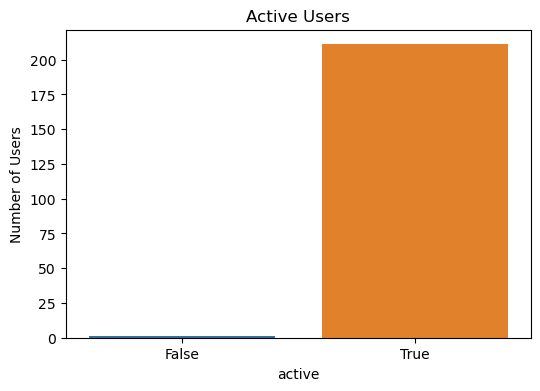

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'user_df' is your DataFrame with the user data

# Visualize 'active' column
plt.figure(figsize=(6, 4))
sns.countplot(x='active', data=df_users_copy_wo_duplicates)
plt.title('Active Users')
plt.ylabel('Number of Users')
plt.show()

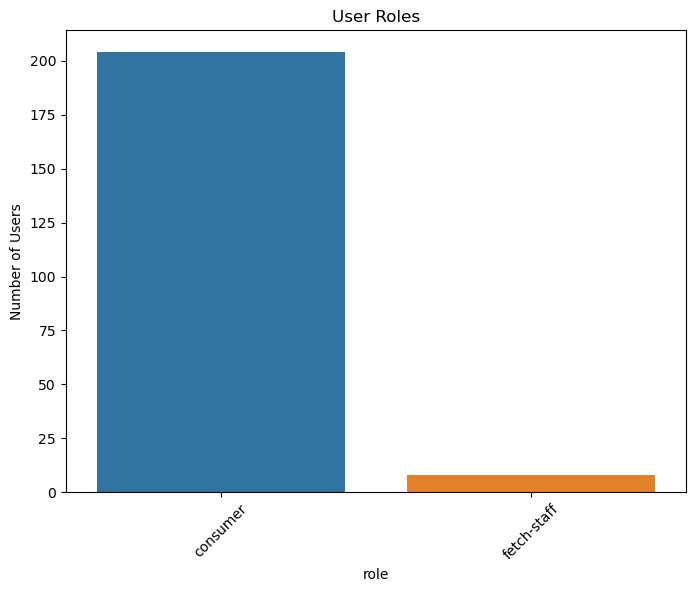

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='role', data=df_users_copy_wo_duplicates)
plt.title('User Roles')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

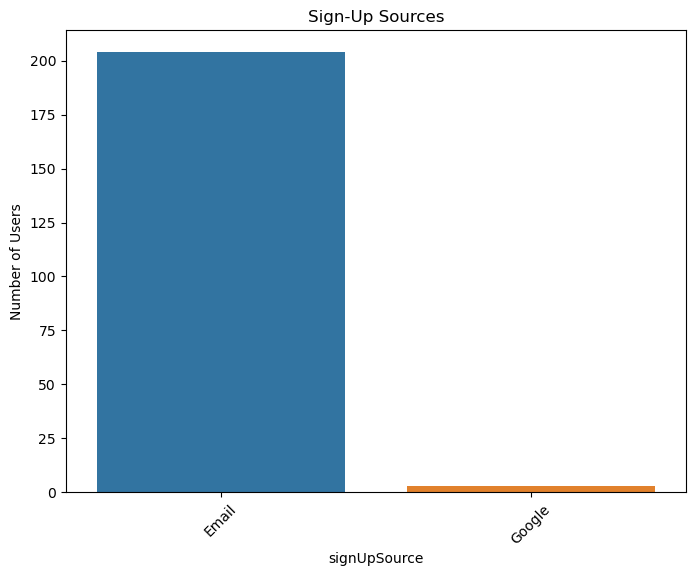

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='signUpSource', data=df_users_copy_wo_duplicates)
plt.title('Sign-Up Sources')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

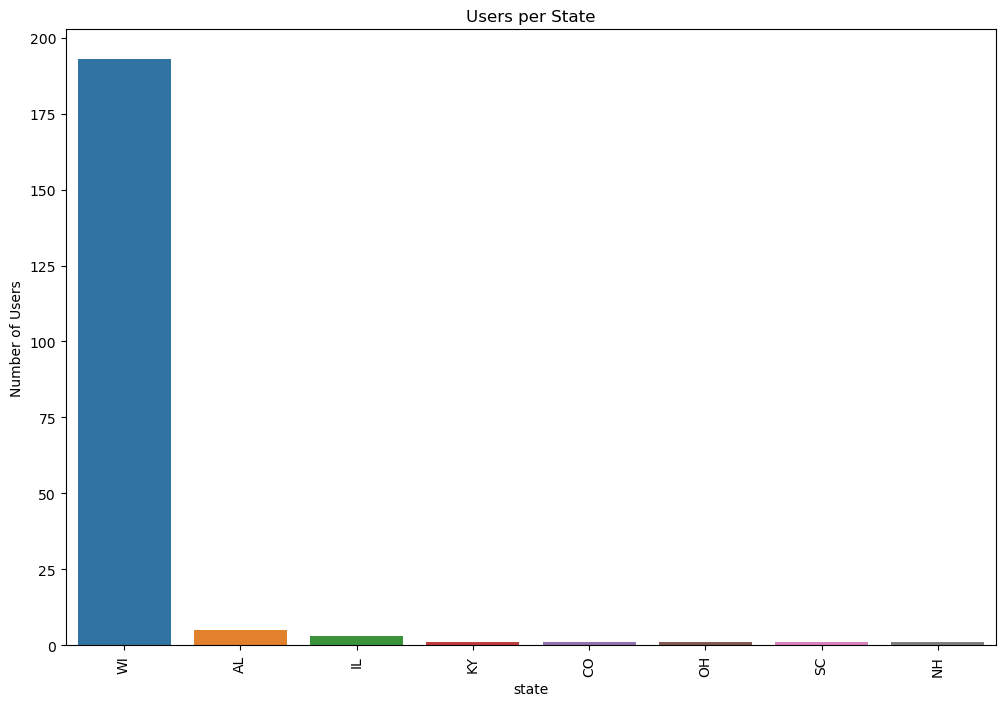

In [41]:
plt.figure(figsize=(12, 8))
sns.countplot(x='state', data=df_users_copy_wo_duplicates, order=df_users_copy_wo_duplicates['state'].value_counts().index)
plt.title('Users per State')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.show()


# Observation:
1) From the active user plot we can say that most of the users are active users which is around 200 plus and only 1 non active user

2) From The user roles source graph we can say that mainly the majority are consumer and the other are fetch staff

3) From signup source we can say that most of them login through email compared to google

4) Ftom the user state we can say most of the users are from Wisconsin

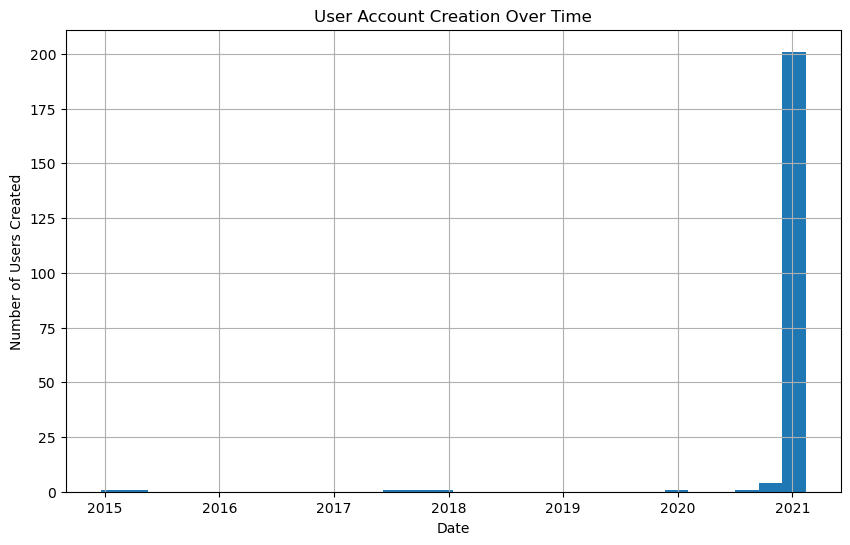

In [42]:
plt.figure(figsize=(10, 6))
df_users_copy_wo_duplicates['createdDate'].hist(bins=30)
plt.title('User Account Creation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users Created')
plt.show()

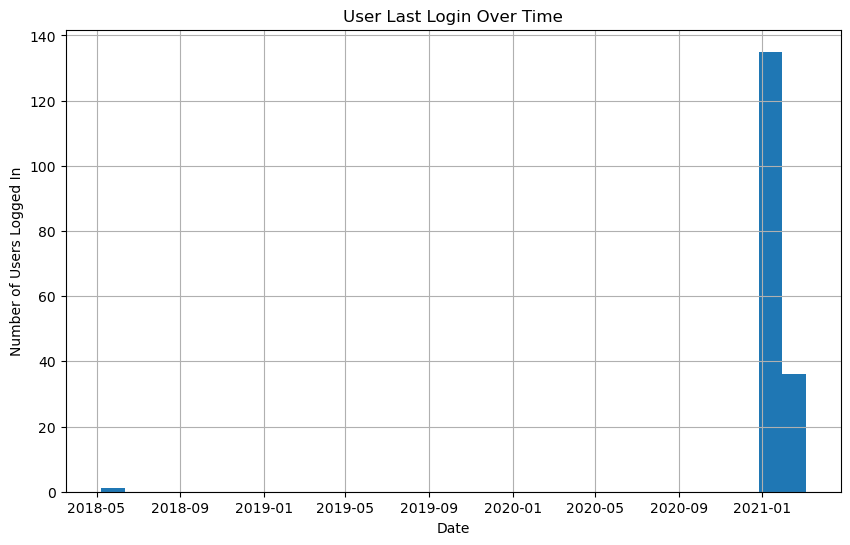

In [43]:
plt.figure(figsize=(10, 6))
df_users_copy_wo_duplicates['lastLogin'].hist(bins=30)
plt.title('User Last Login Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users Logged In')
plt.show()

# Observation:

1) We can say from the created date graph that most of users created is in the year 2021 and month january

2) As most users are created in the 2021-01. The most use of it is done in 2021-01 

In [45]:
df_users_copy_wo_duplicates.isna().sum()

u_id             0
active           0
createdDate      0
lastLogin       40
role             0
signUpSource     5
state            6
dtype: int64

In [46]:
df_users_copy_wo_duplicates.describe()

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_22724\1828588769.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_users_copy_wo_duplicates.describe()


,u_id,active,createdDate,lastLogin,role,signUpSource,state
count,212,212,212,172,212,207,206
unique,212,2,212,172,2,2,8
top,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800000,2021-01-03 15:25:37.858000128,consumer,Email,WI
freq,1,211,1,1,204,204,193
first,NaN,NaN,2014-12-19 14:21:22.380999936,2018-05-07 17:23:40.003000064,NaN,NaN,NaN
last,NaN,NaN,2021-02-12 14:11:06.240000,2021-03-05 16:52:23.204000,NaN,NaN,NaN


# Get the PreProcessed Data in CSV and JSON format 

In [47]:
df_users_copy_wo_duplicates.to_csv('UserData_Preprocessed.csv', index=False) 

In [48]:
df_users_copy_wo_duplicates.to_json('UserData_Preprocessed.json', orient='records', lines=True)